# Project Linear Regression: Boston House Price Prediction


--------------------------
### Problem Statement
---------------------------
The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
### Data Information
---------------------------
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#ignore warnings
import warnings
warnings.filterwarnings("ignore")


###Load the dataset

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [3]:
df.shape

(506, 13)

**Get the info data types column wise**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [5]:
#using the isnull method of Pandas DataFrame to find the missing values
# sum() method is used to calulate total numner of null per column
# intersting to note that the DataFrame isna() method will produce same results as well
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis

In [6]:
#using the describe method to analyze the statisitcal summary.
#the output data is trasformed for better readblity
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Insights:**

The skewness of data can be understood by comparing the meand the median of the inidividual attributes. In general 

   **- mean > median ( 50% ) -> distribution is skewed to the right**
   
   **- mean < median ( 50% ) -> distribution is skewed to the left**
    
The following variables exhibit right skewness
CRIM, ZN, INDUS, DIS, RAD, TAX, NOX, LSTAT, MEDV


The following variables exhibit left skewness
AGE, PTRATIO

CHAS is mentioned to be a dummy variable hence not relevant for this analysis.

The following variables mean and median are very close hence skewness is marginal
RM


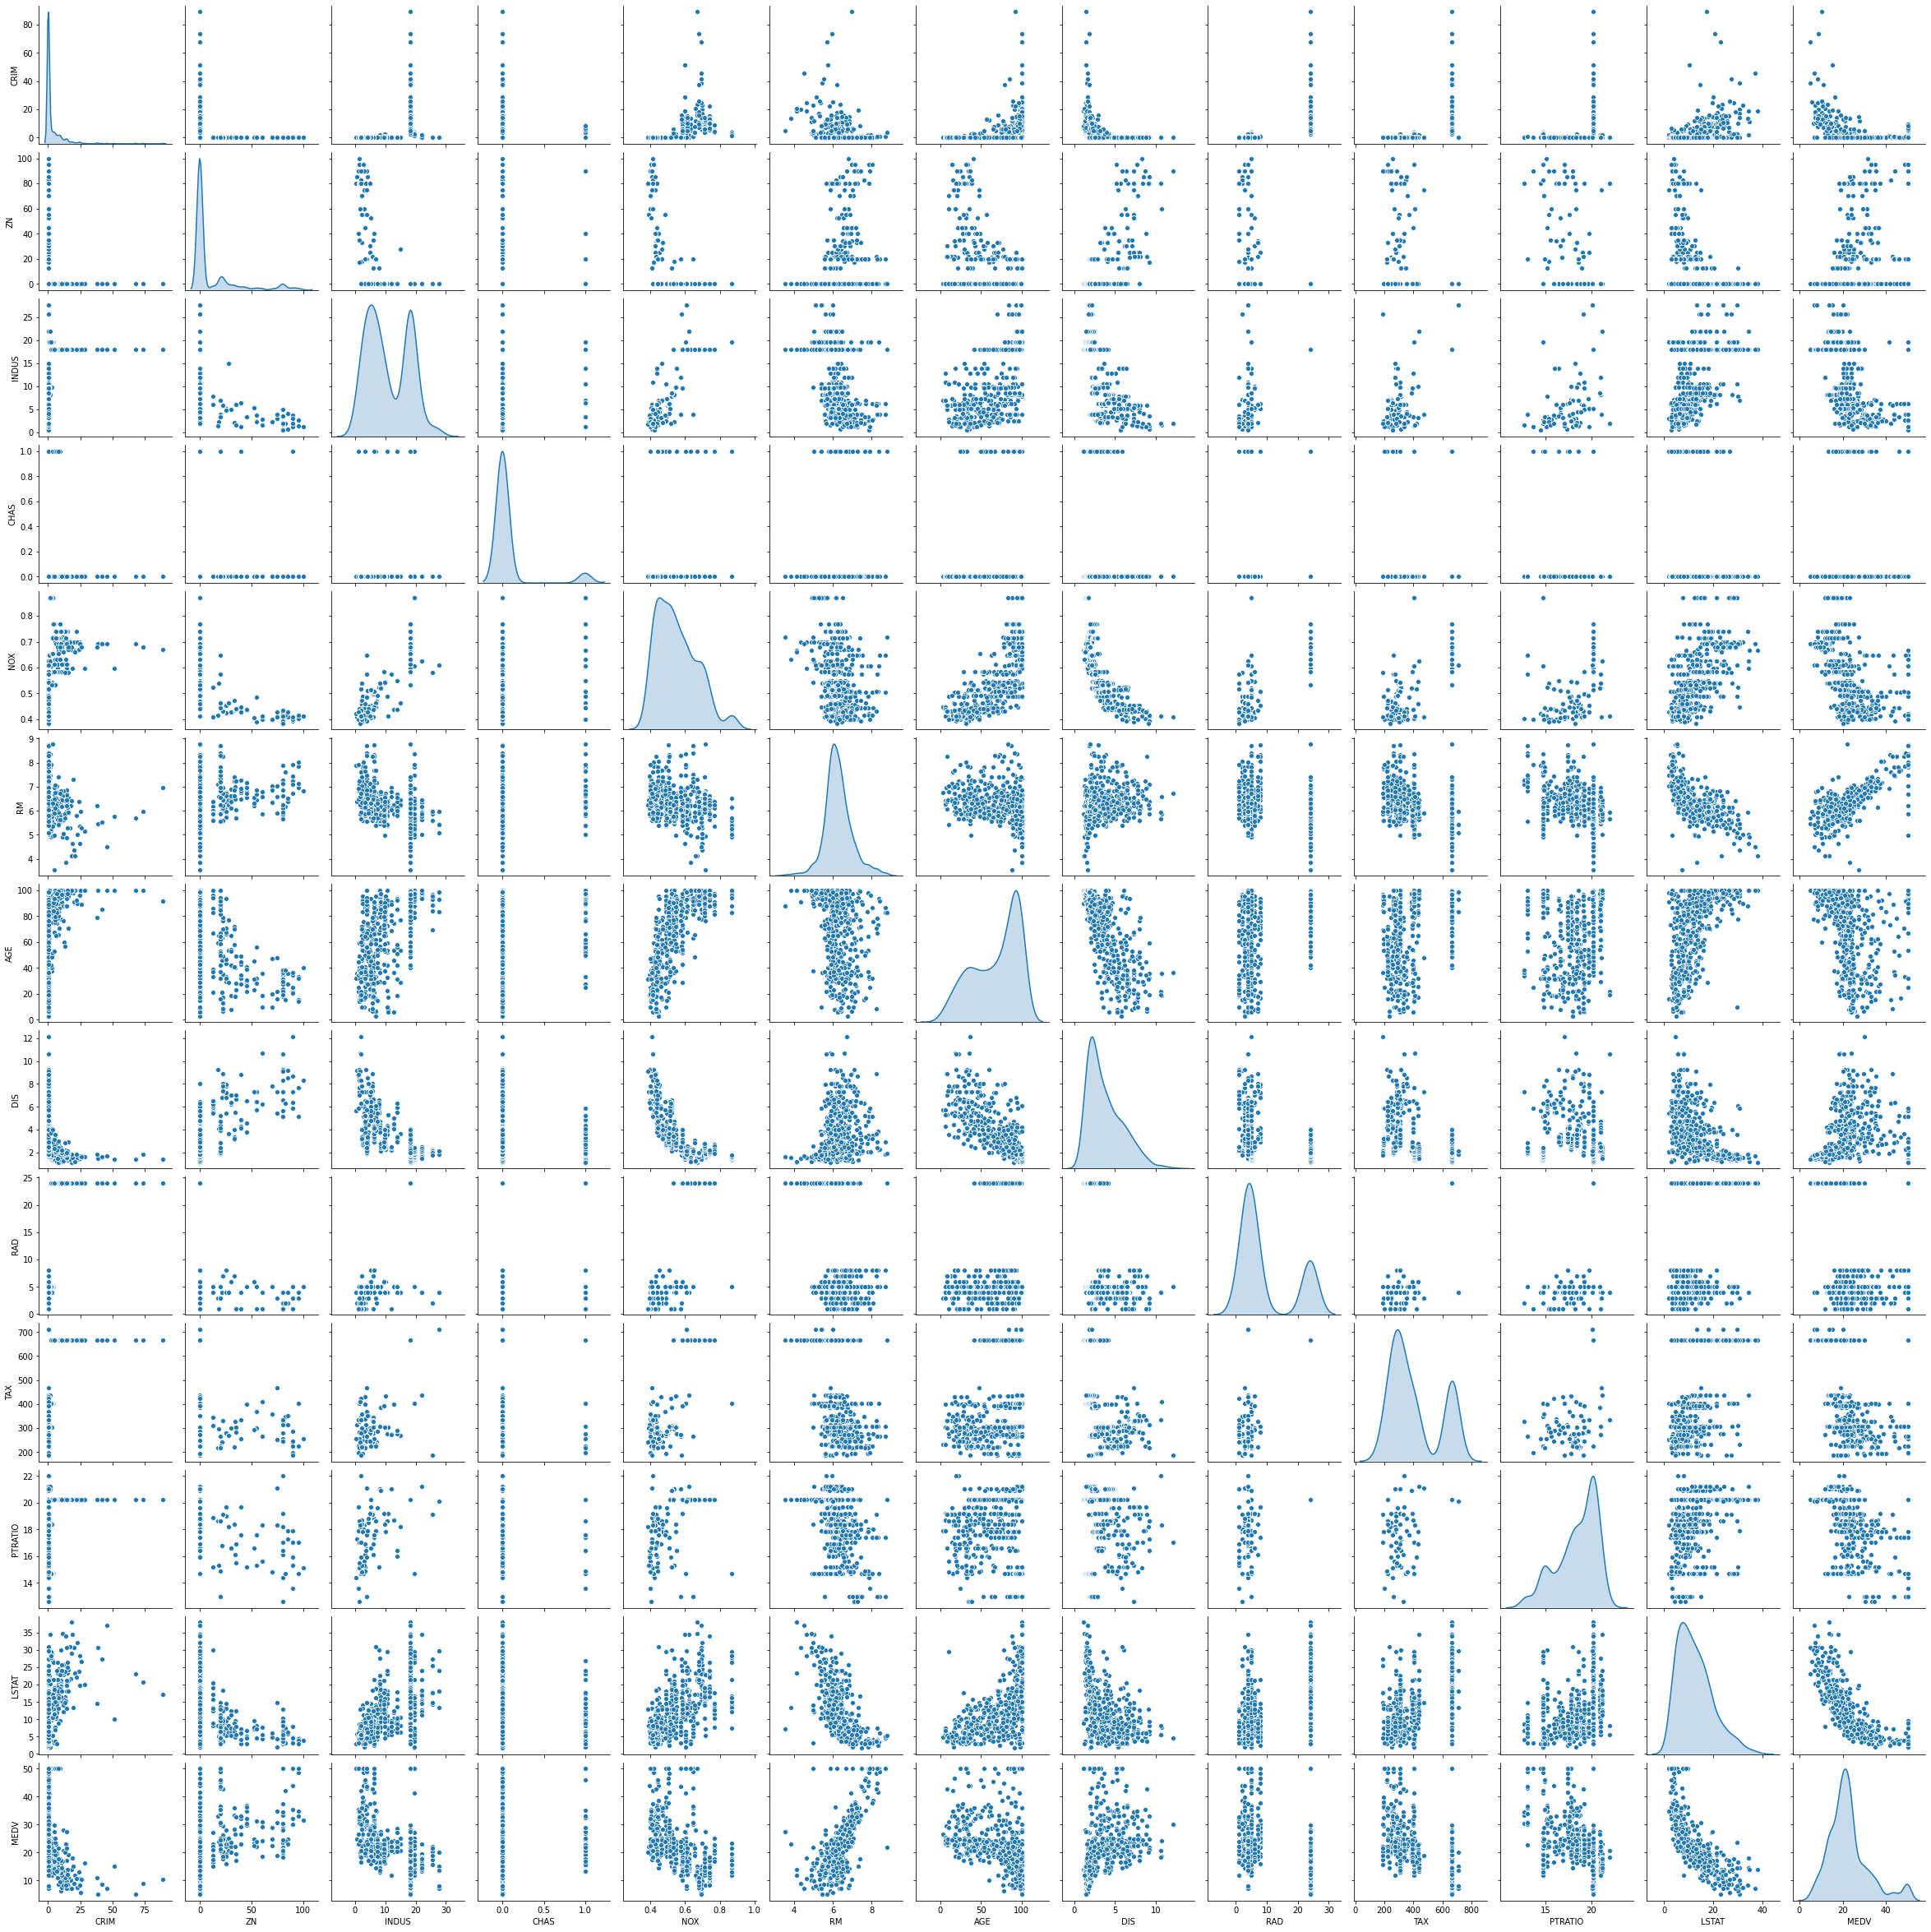

In [6]:
#pairplot
sns.pairplot(df, diag_kind='kde')

**Insights -**

In our dataset the variable MEDV is the Median value of owner-occupied homes in 1000 dollars.
MEDV is our target variable (Y). Our goal is to develop a model to predict MEDV ( dependent variable ) based on the other indepenedent variables in the dataset.

The pairplot provides us the following insights:

1. KDE plot is analogous to distribution of the data, however KDE smoothens the data by default. Still can be used for understanding the distribution of data, determine skewness and visualize modality.

The following independent variables exhibit bi-modal distribution
INDUS,RAD,TAX

Observation about skewness:

    
The following independent variables exhibit right skewness
CRIM, ZN, INDUS, DIS, RAD, TAX, NOX, LSTAT


The following variables exhibit left skewness
AGE, PTRATIO

CHAS is categorical variable, KDE plots continuous variables.

2. Linear co-realation between MEDV and the independent variables
RM has postitive linear relation with MEDV
LSTAT has negative linear relation with MEDV

3. Co-relation between independent variables to determine any signs of multicollinearity in observed data.
RM & LSTAT has negative linear relation
NOX & DIS has linear negative relation


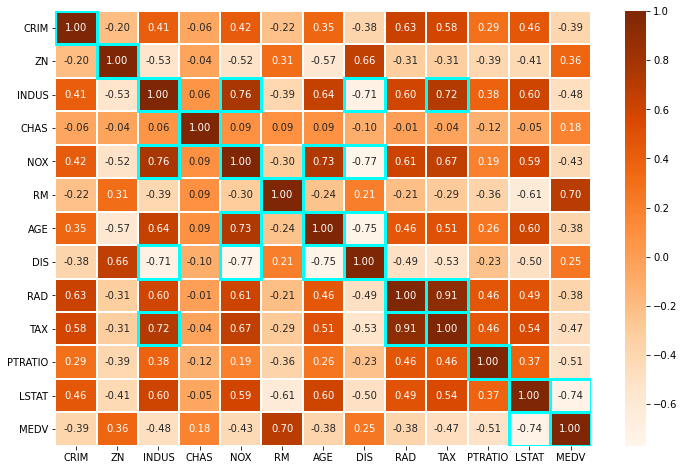

In [7]:
plt.figure(figsize=(12,8))

#creating the heatmap to be ploted
g=sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Oranges',linewidths = 1, linecolor='white')


#Highlight correlations abvoe 0.7
#importing recatangle shape from patches library
from matplotlib.patches import Rectangle

#storing axes location as reference to plot the rectangles
ax = g.axes

#The rectangle method uses xy coordinates to plot the shape
#Converting datafram to matrix format ( 2 dimensional array in numpy)
corr_arr = df.corr().to_numpy()

#Finding the location in the matrix where correlation values is greater than 0.7
#Using abs function as correlation values range from -1 to 1
hlt_idx = np.where(np.abs(corr_arr) > 0.7)

#zipping the two output arrays to get exact coordinates in the matrix
hlt_cord = list(zip(hlt_idx[0],hlt_idx[1]))

#for loop to iterate throuhg all the coordinates 
for i in hlt_cord:
    ax.add_patch(Rectangle((i), 1, 1, fill=False, edgecolor='aqua', lw=3))
plt.show()

#References:
#https://stackoverflow.com/questions/31290778/add-custom-border-to-certain-cells-in-a-matplotlib-seaborn-plot
#https://thispointer.com/find-the-index-of-a-value-in-numpy-array/

**Comments**

There is storng negative corelation (-0.77) between NOX & DIS.
This indicates that with the increase of one variable the other variable value will decrease.

Dependent variable MEDV has strong corelation with LSTAT

### Data Preparation
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [8]:
Y = df['MEDV']
X = df.drop(columns = {'MEDV'})

In [9]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

#using fit_transform method to fit and tranform training data
X_train = ss.fit_transform(X_train)

X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

#using fit method to fit test data
X_test = ss.transform(X_test)

X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

### Implementing linear regression model

In [11]:
# Intialise the model and fit the model on the train data
# Let us use the Kfold cross validation with k = 10

from sklearn.model_selection import cross_val_score

#Creating instance of LinearRegression class 
lr = LinearRegression()

#Using cross validation to examine MSE by using 10 groups
#Passing the training data set to the valdiation model

lr_cv_scores_mse = cross_val_score(lr, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-24.81175391 -40.12026052 -19.9524825  -22.49114263 -11.89140149
 -37.88495594 -32.7209408  -23.7419659  -35.89227889 -10.21700672]

 Average MeanSquared Error: 25.972 (+/- 19.872)


#### Feature Engineering & Selection

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking for multi collinearity using VIF
#Independent variable with score greater than 5 can be removed to re-evaluated model performance
vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series))

Series before feature selection: 

CRIM        1.924114
ZN          2.743574
INDUS       3.999538
CHAS        1.076564
NOX         4.396157
RM          1.860950
AGE         3.150170
DIS         4.355469
RAD         8.345247
TAX        10.191941
PTRATIO     1.943409
LSTAT       2.861881
dtype: float64



**Lets drop the feature TAX**

In [13]:
# Drop the feature and report the average mean_squared_Error metric with Kfold cross validation, k = 5

X_train2 = X_train.drop(columns = ['TAX'])

lr = LinearRegression()

lr_cv_scores_mse = cross_val_score(lr, X_train2, y_train, cv = 5, scoring='neg_mean_squared_error')
lr_cv_scores_mse.mean()

print(lr_cv_scores_mse)
print()
print(" Average MeanSquared Error: %0.3f (+/- %0.3f)" % (lr_cv_scores_mse.mean()*-1, lr_cv_scores_mse.std() * 2))

[-33.09895729 -19.12335267 -28.55114912 -29.41833681 -22.53167693]

 Average MeanSquared Error: 26.545 (+/- 10.057)


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)

print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

CRIM       1.923159
ZN         2.483399
INDUS      3.270983
CHAS       1.050708
NOX        4.361847
RM         1.857918
AGE        3.149005
DIS        4.333734
RAD        2.942862
PTRATIO    1.909750
LSTAT      2.860251
dtype: float64



**All vif scores under 5**

In [15]:
# Using the X_train as it has the least average MSE value

X_test = X_test[X_train.columns]

lr = LinearRegression()

lr.fit(X_train, y_train)
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print("Train Rsquared:", lr.score(X_train, y_train))
print("Test R squared:", lr.score(X_test, y_test))

Train Rsquared: 0.7073732058856179
Test R squared: 0.772168489913416


In [16]:
from sklearn.metrics import mean_squared_error
#calculating model metrics
def RMSE(actual, prediction):
  #Your Code here. Return the RMSE#
    mse=mean_squared_error(actual,prediction)
    rmse = mse**0.5
    return rmse


In [17]:
testRMSE= RMSE(y_test,test_pred)

trainRMSE = RMSE(y_train, train_pred)

In [18]:
testRMSE, trainRMSE

(4.5696586527458, 4.874227661429436)

In [19]:
a = lr.coef_

# get the intercept value and append to the Coeffienct
Coefs = np.append(a,lr.intercept_)

#Creating the Features from the column name
Feature = np.append(X_train.columns,'NA')
coeff_data = pd.DataFrame(data={'Feature':Feature,'Coefs':Coefs})

coeff_data

,Feature,Coefs
0,CRIM,-0.969104
1,ZN,1.437475
2,INDUS,0.370610
3,CHAS,0.701135
4,NOX,-2.622148
5,RM,1.866446
6,AGE,0.136517
7,DIS,-3.274621
8,RAD,2.626639
9,TAX,-1.940001


In [20]:
# Equation of the fit
Equation = "Price ="
print(Equation, end='\t')
for i in range(0, 13):
    if(i!=12):
        print("(",coeff_data.iloc[i].Coefs,")", "*", coeff_data.iloc[i].Feature, "+", end = '  ')
    else:
        print(coeff_data.iloc[i].Coefs)

Price =	( -0.9691041779394559 ) * CRIM +  ( 1.4374751085628352 ) * ZN +  ( 0.37061006699438026 ) * INDUS +  ( 0.7011346214239947 ) * CHAS +  ( -2.622147525842737 ) * NOX +  ( 1.8664458062800238 ) * RM +  ( 0.13651655309868496 ) * AGE +  ( -3.2746207827625136 ) * DIS +  ( 2.626638511065884 ) * RAD +  ( -1.940001225241942 ) * TAX +  ( -2.120298107079978 ) * PTRATIO +  ( -4.2600571415145705 ) * LSTAT +  22.339830508474577
